In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import os

def load_latent_data(output_dir, rollout_ids):
    mu_list = []
    for rollout_id in rollout_ids:
        mu = np.load(os.path.join(output_dir, f"mu_rollout_{rollout_id}.npy"))
        mu_list.append(mu)
    return np.concatenate(mu_list, axis=0)

def visualize_latent_space(mu, method='pca'):
    if method == 'pca':
        reducer = PCA(n_components=2)
        reduced_mu = reducer.fit_transform(mu)
        
        # 累積寄与率をプロット
        explained_variance = reducer.explained_variance_ratio_
        cumulative_variance = explained_variance.cumsum()
        plt.figure(figsize=(8, 6))
        plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
        plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, label='Individual explained variance')
        plt.xlabel('Principal component index')
        plt.ylabel('Explained variance ratio')
        plt.legend()
        plt.title('PCA Explained Variance')
        plt.show()

    elif method == 'tsne':
        perplexity = min(30, mu.shape[0] // 2)
        reducer = TSNE(n_components=2, perplexity=perplexity, random_state=42)
        reduced_mu = reducer.fit_transform(mu)
    else:
        raise ValueError("Unknown method for dimensionality reduction")

    # 2Dプロット
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_mu[:, 0], reduced_mu[:, 1], alpha=0.6, edgecolor='k')
    plt.title(f"{method.upper()} Visualization of Latent Space (mu)")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()



def plot_logvar_std(logvar):
    # logvar -> 標準偏差に変換
    std = np.sqrt(np.exp(logvar))
    print(std)

    plt.figure(figsize=(12, 6))
    for dim in range(std.shape[1]):  # 各次元の分布をプロット
        plt.hist(std[:, dim], bins=30, alpha=0.5, label=f'Dim {dim+1}')
    plt.title('Standard Deviation of Latent Variables (logvar)')
    plt.xlabel('Standard Deviation')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right', fontsize=8, ncol=4)
    plt.grid()
    plt.show()




mu shape: (2, 32)
mu mean per dimension: [-0.00381074 -0.2928846   0.00136054 -0.10727392  0.15322685  0.07955195
 -0.1154208   0.09548421  0.04992709  0.09666657 -0.03704707 -0.11737303
 -0.3540817   0.16245586  0.0437377   0.05693623 -0.03559785 -0.23096018
 -0.13503514 -0.18456225  0.03547644  0.06028936  0.09260619 -0.1849088
 -0.06913154  0.20913102 -0.11084949 -0.3405942   0.05401669 -0.01955666
  0.02906872 -0.06991297]
mu variance per dimension: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [3]:
# 使用例
output_dir = "ckpt_dir1206_p_c_ac50_epi5tmpout3000_gripper/latent_data"
rollout_ids = [0]  # 必要なロールアウト ID を指定
mu = load_latent_data(output_dir, rollout_ids)
logvar = load_latent_data(output_dir,rollout_ids)

mu = mu.squeeze()
logvar = logvar.squeeze()
print(mu.shape)
print(logvar.shape)


(2, 32)
(2, 32)


In [6]:
print("mu shape:", mu.shape)
print("mu mean per dimension:", mu.mean(axis=0))
print("mu variance per dimension:", mu.var(axis=0))

mu shape: (2, 32)
mu mean per dimension: [-0.00381074 -0.2928846   0.00136054 -0.10727392  0.15322685  0.07955195
 -0.1154208   0.09548421  0.04992709  0.09666657 -0.03704707 -0.11737303
 -0.3540817   0.16245586  0.0437377   0.05693623 -0.03559785 -0.23096018
 -0.13503514 -0.18456225  0.03547644  0.06028936  0.09260619 -0.1849088
 -0.06913154  0.20913102 -0.11084949 -0.3405942   0.05401669 -0.01955666
  0.02906872 -0.06991297]
mu variance per dimension: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


/home/shuntaroitakuralab/miniconda3/envs/aloha/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:543: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var


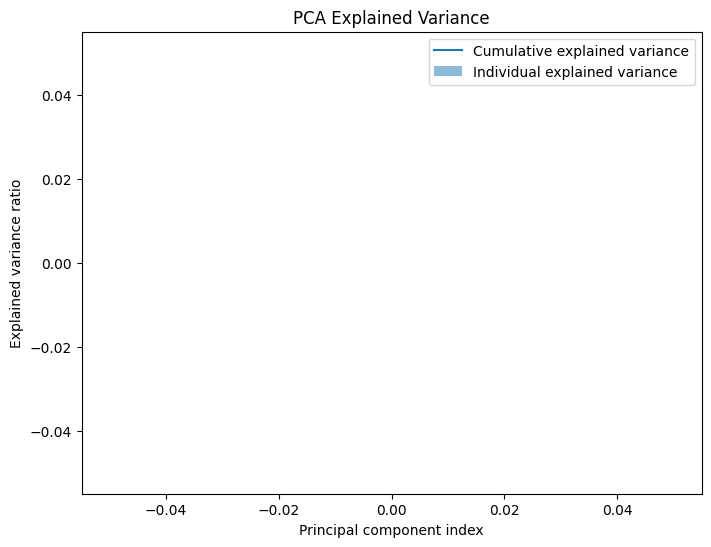

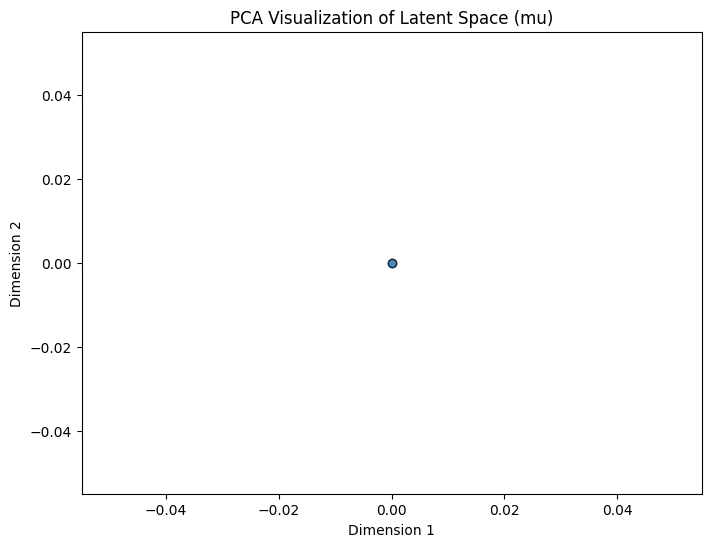

In [4]:
# PCAで可視化
visualize_latent_space(mu, method='pca')


In [ ]:
# # t-SNEで可視化
# visualize_latent_space(mu, method='tsne')

: 

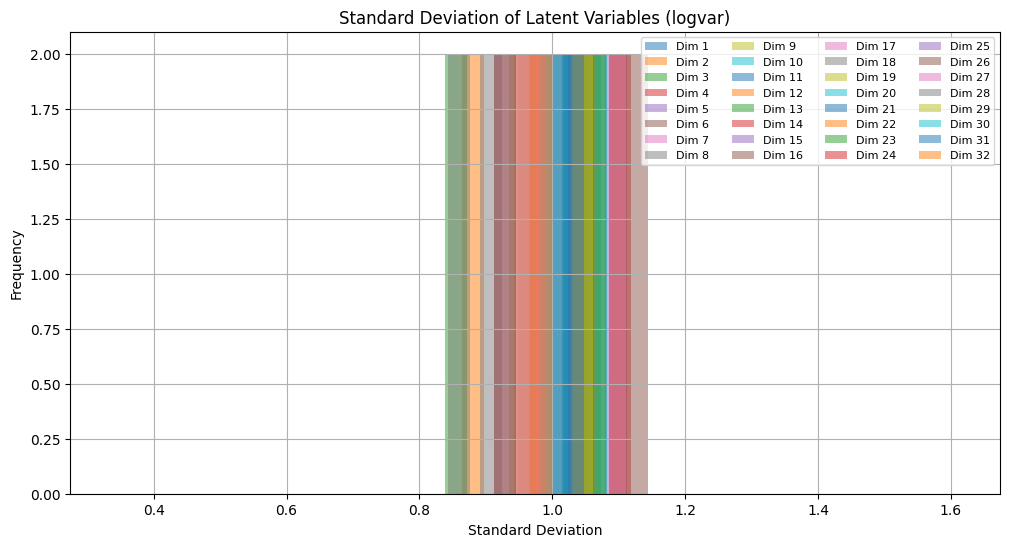

In [7]:
plot_logvar_std(logvar)